In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Percentiles

In [2]:
v = [1, 7, 3, 9, 5]
v

[1, 7, 3, 9, 5]

In [3]:
percentile(20, v)

1

In [4]:
Table(['Percent', 'Percentile']).with_rows([
   [ 1, percentile( 1, v)], 
   [10, percentile(10, v)], 
   [20, percentile(20, v)], 
   [39, percentile(39, v)], 
   [40, percentile(40, v)], 
   [41, percentile(41, v)], 
   [50, percentile(50, v)], 
])

Percent,Percentile
1,1
10,1
20,1
39,3
40,3
41,5
50,5


## Estimation

In [5]:
sf = Table.read_table('http://inferentialthinking.com/notebooks/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format('Total Compensation', NumberFormatter(0))
sf = sf.where('Total Compensation', are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [6]:
sf.sort('Total Compensation')

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,"10,006"
Public Protection,EMT Paramedic,"10,009"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","10,010"
Human Welfare & Neighborhood Development,Public Service Trainee,"10,010"
General Administration & Finance,Communications Systems Tech,"10,014"
Community Health,Patient Care Assistant,"10,015"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,017"


In [7]:
sf.sort('Total Compensation', descending=True)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"
"Public Works, Transportation & Commerce",Dept Head V,"426,686"
Community Health,"Adm, SFGH Medical Center","422,800"
Public Protection,"Chief, Fire Department","418,844"
"Public Works, Transportation & Commerce",Executive Contract Employee,"417,848"
Community Health,Senior Physician Specialist,"415,457"
Public Protection,Chief Of Police,"414,791"
"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept","405,050"


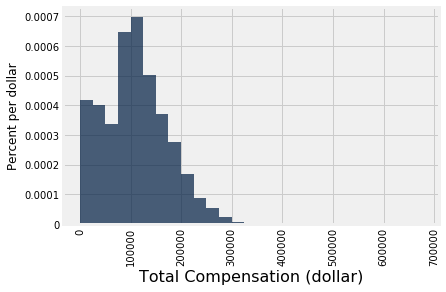

In [8]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=comp_bins, unit='dollar')

In [9]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
Community Health,Registered Nurse,"169,419"
General Administration & Finance,"Investigator, Tax Collector","131,273"
"Public Works, Transportation & Commerce",Automotive Mechanic,"152,983"


In [10]:
np.median(sample_from_population.column('Total Compensation'))

113721.995

In [11]:
percentile(50, sample_from_population.column('Total Compensation'))

113485.81

## Sample variability

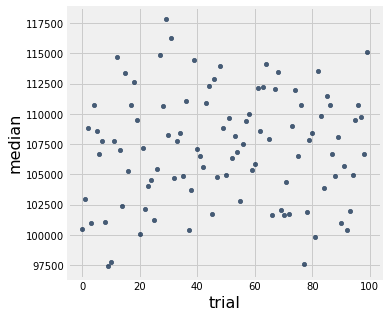

In [12]:
medians = make_array()
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, with_replacement=False)
    median = np.median(sample.column('Total Compensation'))
    medians = np.append(medians, median)

Table().with_columns('trial', repetitions, 'median', medians).scatter('trial')

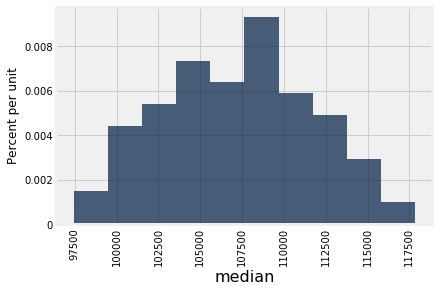

In [13]:
Table().with_columns('median', medians).hist()

In [14]:
percentile(2.5, medians)

97777.630000000005

In [15]:
percentile(97.5, medians)

115122.79000000001

In [16]:
print("95% of sample medians were between", 
      percentile(2.5, medians),
      "and",
      percentile(97.5, medians))

95% of sample medians were between 97777.63 and 115122.79


## Bootstrap

In [17]:
sample_from_population # From now on, this is all we have.

Organization Group,Job,Total Compensation
Community Health,Registered Nurse,"169,419"
General Administration & Finance,"Investigator, Tax Collector","131,273"
"Public Works, Transportation & Commerce",Automotive Mechanic,"152,983"
Community Health,Registered Nurse,"177,594"
"Public Works, Transportation & Commerce",Engineering Associate 2,"136,377"
"Public Works, Transportation & Commerce",Transit Operator,"142,048"
Public Protection,Deputy Court Clerk II,"113,958"
Community Health,Special Nurse,"66,375"
"Public Works, Transportation & Commerce",Custodian,"93,081"
General Administration & Finance,Senior Personnel Analyst,"11,615"


In [18]:
np.median(sample_from_population.column('Total Compensation'))

113721.995

In [19]:
resample_1 = sample_from_population.sample()
resample_1

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Welder,"132,568"
"Public Works, Transportation & Commerce",Custodian,"94,403"
Culture & Recreation,Custodian,"92,484"
"Public Works, Transportation & Commerce",Transit Operator,"15,798"
Community Health,Medical Social Worker,"130,991"
Public Protection,EMT/Paramedic/Firefighter,"204,450"
General Administration & Finance,Senior Clerk,"75,897"
General Administration & Finance,Senior Clerk,"75,897"
Community Health,Registered Nurse,"169,419"
"Public Works, Transportation & Commerce",Transit Operator,"15,798"


In [20]:
np.median(resample_1.column('Total Compensation'))

115547.67999999999

In [21]:
resample_2 = sample_from_population.sample()
np.median(resample_2.column('Total Compensation'))

111514.45000000001

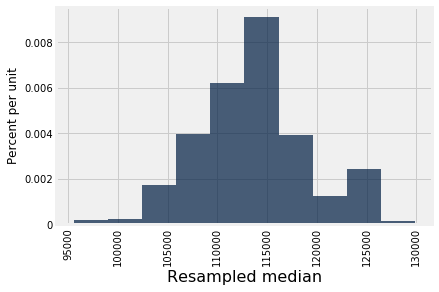

In [22]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
Table().with_column('Resampled median', resampled_medians).hist()

## Confidence Intervals

In [23]:
print("95% of resampled medians were between", 
      percentile(2.5, resampled_medians),
      "and",
      percentile(97.5, resampled_medians))

95% of resampled medians were between 104982.825 and 124113.305


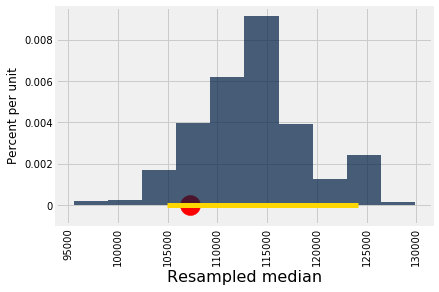

In [24]:
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist(0)
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)

In [25]:
sample_from_population = sf.sample(200)
median_of_sample = np.median(sample_from_population.column('Total Compensation'))
print('Sample median:', median_of_sample)

Sample median: 106272.48


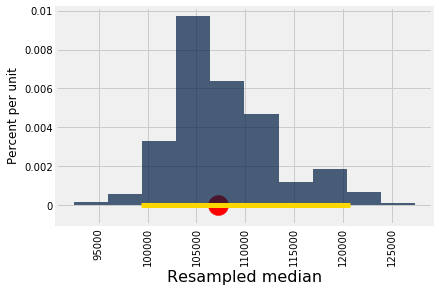

In [26]:
resampled_medians = make_array()
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    resampled_medians = np.append(resampled_medians, median)
    
interval_95 = [percentile(2.5, resampled_medians),
               percentile(97.5, resampled_medians)]

Table().with_column('Resampled median', resampled_medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=5)
pop_median = np.median(sf.column('Total Compensation'))
plots.scatter(pop_median, 0, color='red', s=400)

In [27]:
intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200)
    resampled_medians = make_array()
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column('Total Compensation'))
        resampled_medians = np.append(resampled_medians, median)

    interval_95 = [percentile(2.5, resampled_medians),
                   percentile(97.5, resampled_medians)]

    intervals.append(interval_95)
    print('trial number', j, 'of 100')

trial number 0 of 100
trial number 1 of 100
trial number 2 of 100
trial number 3 of 100
trial number 4 of 100
trial number 5 of 100
trial number 6 of 100
trial number 7 of 100
trial number 8 of 100
trial number 9 of 100
trial number 10 of 100
trial number 11 of 100
trial number 12 of 100
trial number 13 of 100
trial number 14 of 100
trial number 15 of 100
trial number 16 of 100
trial number 17 of 100
trial number 18 of 100
trial number 19 of 100
trial number 20 of 100
trial number 21 of 100
trial number 22 of 100
trial number 23 of 100
trial number 24 of 100
trial number 25 of 100
trial number 26 of 100
trial number 27 of 100
trial number 28 of 100
trial number 29 of 100
trial number 30 of 100
trial number 31 of 100
trial number 32 of 100
trial number 33 of 100
trial number 34 of 100
trial number 35 of 100
trial number 36 of 100
trial number 37 of 100
trial number 38 of 100
trial number 39 of 100
trial number 40 of 100
trial number 41 of 100
trial number 42 of 100
trial number 43 of 10

In [28]:
truth = np.median(sf.column('Total Compensation'))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

96